# Stock Price Prediction 

In [23]:
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

### 1.1 Loading dataset

In [28]:
tsla_df = pd.read_csv('tsla.csv')

## 2.0 Exploratory Data Analysis 

### 2.1 First 5 rows 

In [29]:
tsla_df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,StockSplits
0,2020-11-05 00:00:00-05:00,142.766663,146.666672,141.333328,146.029999,85243500,0,0.0
1,2020-11-06 00:00:00-05:00,145.366669,145.523331,141.426666,143.316666,65118000,0,0.0
2,2020-11-09 00:00:00-05:00,146.500000,150.833328,140.333328,140.419998,104499000,0,0.0
3,2020-11-10 00:00:00-05:00,140.029999,140.029999,132.009995,136.786667,90852600,0,0.0
4,2020-11-11 00:00:00-05:00,138.816666,139.566666,136.860001,139.043335,52073100,0,0.0


### 2.2 Dropping Unnecessary features 

In [30]:
tsla_df = tsla_df.drop(['Dividends'], axis=1)
tsla_df

# shape of the dataset = 504-rows x 6-cols

,Date,Open,High,Low,Close,Volume,StockSplits
0,2020-11-05 00:00:00-05:00,142.766663,146.666672,141.333328,146.029999,85243500,0.0
1,2020-11-06 00:00:00-05:00,145.366669,145.523331,141.426666,143.316666,65118000,0.0
2,2020-11-09 00:00:00-05:00,146.500000,150.833328,140.333328,140.419998,104499000,0.0
3,2020-11-10 00:00:00-05:00,140.029999,140.029999,132.009995,136.786667,90852600,0.0
4,2020-11-11 00:00:00-05:00,138.816666,139.566666,136.860001,139.043335,52073100,0.0
...,...,...,...,...,...,...,...
499,2022-10-31 00:00:00-04:00,226.190002,229.850006,221.940002,227.539993,61554300,0.0
500,2022-11-01 00:00:00-04:00,234.050003,237.399994,227.279999,227.820007,62688800,0.0
501,2022-11-02 00:00:00-04:00,226.039993,227.869995,214.820007,214.979996,63070300,0.0
502,2022-11-03 00:00:00-04:00,211.360001,221.199997,210.139999,215.309998,56538800,0.0


### 2.3 Checking the count of null / NA values in each feature

In [31]:
tsla_df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
StockSplits     0
dtype: int64

### 2.4 Visualizing if it has null / NA values

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: xlabel='count'>

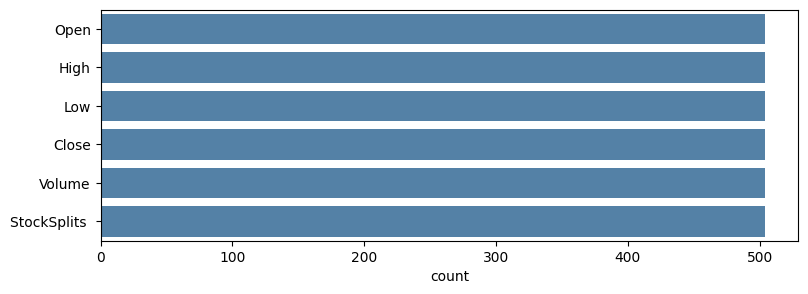

In [32]:
plt.figure(figsize=(9, 3))

sns.countplot(data = tsla_df.iloc[0:], orient='h', color = 'steelblue')          # countplot does not include 'nan' values 

### 2.5 Basic Info of features 

In [33]:
tsla_df.info()                                         # python treats date and datetime as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          504 non-null    object 
 1   Open          504 non-null    float64
 2   High          504 non-null    float64
 3   Low           504 non-null    float64
 4   Close         504 non-null    float64
 5   Volume        504 non-null    int64  
 6   StockSplits   504 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


### 2.6 Statistical Analysis

In [34]:
tsla_df.describe().apply(lambda s: s.apply('{:.3f}'.format)).T                # or s.apply('{:.5f}'.format)

,count,mean,std,min,25%,50%,75%,max
Open,504.000,263.247,53.893,136.310,223.982,251.040,298.625,411.470
High,504.000,269.214,55.158,137.483,229.290,254.903,303.934,414.497
Low,504.000,256.662,52.211,132.010,218.187,243.980,290.100,405.667
Close,504.000,263.029,53.557,136.030,223.654,251.093,296.762,409.970
Volume,504.000,86568662.302,43105164.371,29401800.000,62005000.000,79020000.000,98997225.000,666378600.000
StockSplits,504.000,0.006,0.134,0.000,0.000,0.000,0.000,3.000


In [35]:
tsla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          504 non-null    object 
 1   Open          504 non-null    float64
 2   High          504 non-null    float64
 3   Low           504 non-null    float64
 4   Close         504 non-null    float64
 5   Volume        504 non-null    int64  
 6   StockSplits   504 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


### 2.7 Stock Close as data series

In [36]:
df_close = tsla_df['Close']
df_close

0      146.029999
1      143.316666
2      140.419998
3      136.786667
4      139.043335
          ...    
499    227.539993
500    227.820007
501    214.979996
502    215.309998
503    207.470001
Name: Close, Length: 504, dtype: float64

In [37]:
tsla_df.head()

,Date,Open,High,Low,Close,Volume,StockSplits
0,2020-11-05 00:00:00-05:00,142.766663,146.666672,141.333328,146.029999,85243500,0.0
1,2020-11-06 00:00:00-05:00,145.366669,145.523331,141.426666,143.316666,65118000,0.0
2,2020-11-09 00:00:00-05:00,146.500000,150.833328,140.333328,140.419998,104499000,0.0
3,2020-11-10 00:00:00-05:00,140.029999,140.029999,132.009995,136.786667,90852600,0.0
4,2020-11-11 00:00:00-05:00,138.816666,139.566666,136.860001,139.043335,52073100,0.0


### 2.8 Plots : Open vs Close,  Low vs High

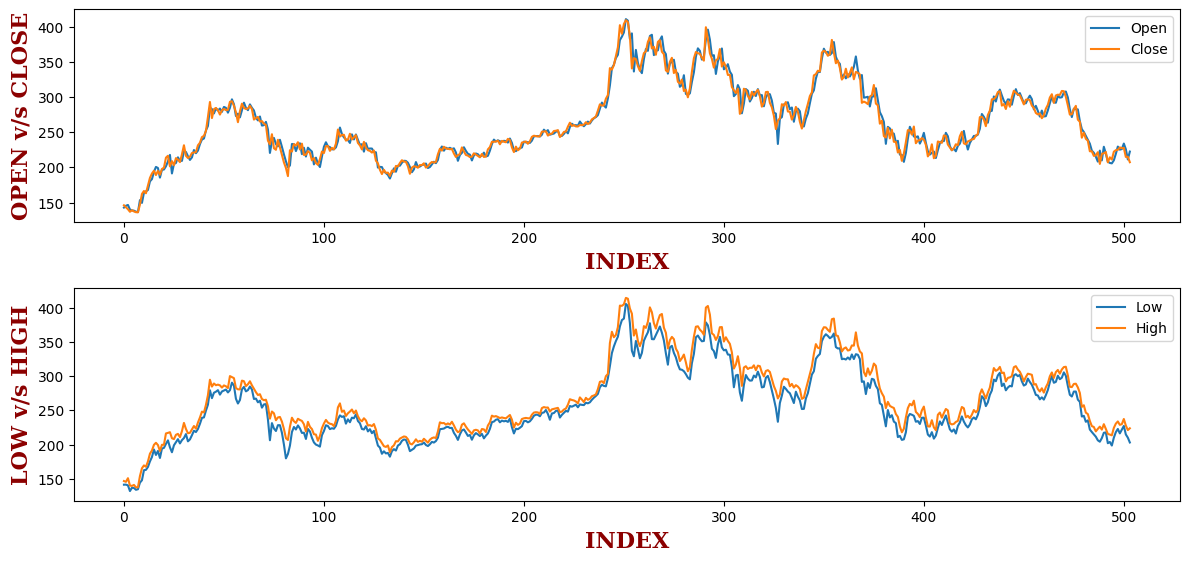

In [38]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(tsla_df['Open'], label='Open')
plt.plot(tsla_df['Close'], label='Close')
plt.xlabel('INDEX', fontdict=font)
plt.ylabel('OPEN v/s CLOSE', fontdict=font)
plt.legend()                                                 # legend() : it is an area describing the elements of the graph

plt.subplot(3, 1, 2)
plt.plot(tsla_df['Low'], label='Low')
plt.plot(tsla_df['High'], label='High')
plt.xlabel('INDEX', fontdict=font)
plt.ylabel("LOW v/s HIGH", fontdict=font)
plt.legend()

plt.tight_layout()                                           # tight_layout() : automatically adjusts the subplots in the area

## 3.0 Train - Test Split

### 3.1 MIN_MAX scaler

In [39]:
# LSTM are sensitive to the scale of the data. MIN_MAX scaler will help to convert that data b/w 0 to 1.
# Min value = 0, Max val = 1
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# eg : (224 - 204) / (409 - 204)  ==  0.0975

scaler = MinMaxScaler(feature_range=(0,1))

# df_close is of type pandas.series i.e, 1-D of shape (504, )
# but scaling object accepts 2-D frame.
# so used np.array to change it into 2-D frame

df_close = scaler.fit_transform(np.array(df_close).reshape(-1, 1))
df_close.shape

# now the shape of df_close is (504, 1)

(504, 1)

<class 'numpy.ndarray'>


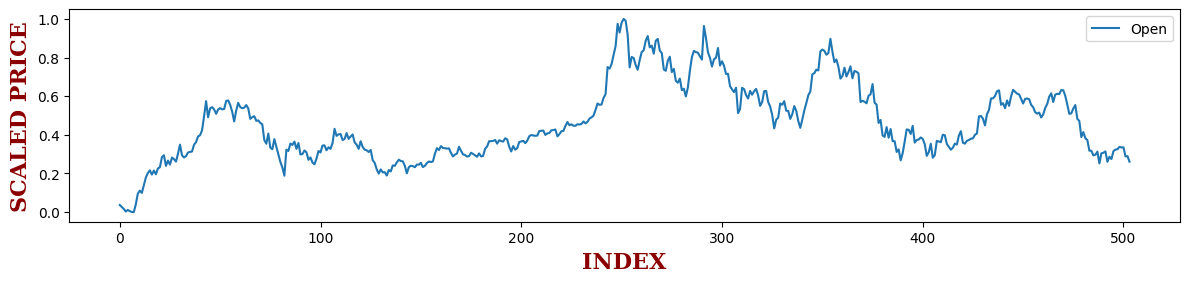

In [40]:
print(type(df_close))
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(df_close, label='Open')
plt.xlabel('INDEX', fontdict=font)
plt.ylabel('SCALED PRICE', fontdict=font)
plt.legend()
plt.tight_layout()

### 3.2 Train - Test split, size and data

In [41]:
train_size = int(len(df_close)*0.70)                       # train size = 70%
test_size = len(df_close) - train_size                     # test size = 30%

train_data, test_data = df_close[0:train_size, :], df_close[train_size:len(df_close), :]

In [42]:
train_size, test_size

(352, 152)

### 3.3 Dividing data

In [43]:
# Whenever we will have time series data, the next data is always dependent on the previous data

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[(i+time_step), 0])
    
    return np.array(dataX), np.array(dataY)

In [44]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [45]:
X_train.shape, y_train.shape

((251, 100), (251,))

### 3.4 Reshapping the dataset

In [46]:
n_features = 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], n_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], n_features) 

In [67]:
X_train.shape, y_

((251, 100, 1), (251, 1))

## 4.0 Model 

### 4.1 Model Definition

In [47]:
# define Stacked LSTM model
# Models that input or output data sequences are called Sequential Model, eg: text stream, audio, video, time-series data etc.

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape = (time_step, n_features)))
# added one LSTM model of 50 neurons
# Return sequence = True, the output of the hidden state of each neuron is used as an input to the next LSTM layer

model.add(LSTM(50, return_sequences = True, activation='relu'))
model.add(LSTM(50))
model.add(Dense(1))
# Dense layer is added to get output in format needed by the user. It is fully connected layer at the end of neural network

model.compile(loss='mean_squared_error', optimizer='adam')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### 4.2 Fitting data to the model

In [49]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose = 1)

# verbose    : visual representation of epoch processing(0/1/2)
# epochs     : Each time a complete/entire dataset passes through an algorithm, it is said to have completed an epoch.
# batch_size : The training data is always broken down into small batches to overcome the issue that could arise due to 
#              storage space limitations of a computer system.

# This procedure is known as an epoch when all the batches are fed into the model to train at once. 
# Another way to define an epoch is the number of passes a training dataset takes around an algorithm. 
# One pass is counted when the data set has done both forward and backward passes. 
# The number of epochs as well as batch_size is considered a hyperparameter.

Epoch 1/100
4/4 [==============================] - 9s 457ms/step - loss: 0.2867 - val_loss: 0.1421
Epoch 2/100
4/4 [==============================] - 1s 162ms/step - loss: 0.1699 - val_loss: 0.0468
Epoch 3/100
4/4 [==============================] - 1s 155ms/step - loss: 0.0492 - val_loss: 0.0629
Epoch 4/100
4/4 [==============================] - 1s 164ms/step - loss: 0.0477 - val_loss: 0.0400
Epoch 5/100
4/4 [==============================] - 1s 278ms/step - loss: 0.0200 - val_loss: 0.0107
Epoch 6/100
4/4 [==============================] - 1s 231ms/step - loss: 0.0281 - val_loss: 0.0111
Epoch 7/100
4/4 [==============================] - 1s 270ms/step - loss: 0.0251 - val_loss: 0.0120
Epoch 8/100
4/4 [==============================] - 1s 145ms/step - loss: 0.0170 - val_loss: 0.0275
Epoch 9/100
4/4 [==============================] - 1s 136ms/step - loss: 0.0188 - val_loss: 0.0281
Epoch 10/100
4/4 [==============================] - 1s 148ms/step - loss: 0.0169 - val_loss: 0.0158
Epoch 11/

4/4 [==============================] - 1s 264ms/step - loss: 0.0052 - val_loss: 0.0136
Epoch 84/100
4/4 [==============================] - 1s 139ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 85/100
4/4 [==============================] - 1s 154ms/step - loss: 0.0052 - val_loss: 0.0155
Epoch 86/100
4/4 [==============================] - 1s 264ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 87/100
4/4 [==============================] - 1s 259ms/step - loss: 0.0051 - val_loss: 0.0110
Epoch 88/100
4/4 [==============================] - 1s 279ms/step - loss: 0.0049 - val_loss: 0.0071
Epoch 89/100
4/4 [==============================] - 1s 259ms/step - loss: 0.0052 - val_loss: 0.0064
Epoch 90/100
4/4 [==============================] - 1s 275ms/step - loss: 0.0050 - val_loss: 0.0112
Epoch 91/100
4/4 [==============================] - 1s 269ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 92/100
4/4 [==============================] - 1s 262ms/step - loss: 0.0049 - val_loss: 0.0116
Epoch 93/100


### 4.3 Prediction

In [50]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 37ms/step


### 4.4 Inverse Scaling

In [51]:
train_predict = scaler.inverse_transform(train_predict)
y_train = y_train.reshape(y_train.shape[0], 1)
y_train = scaler.inverse_transform(y_train)
y_test = y_test.reshape(y_test.shape[0], 1)
y_test = scaler.inverse_transform(y_test)
test_predict = scaler.inverse_transform(test_predict)

### 4.5 Plot : Actual v/s Predicted - Train

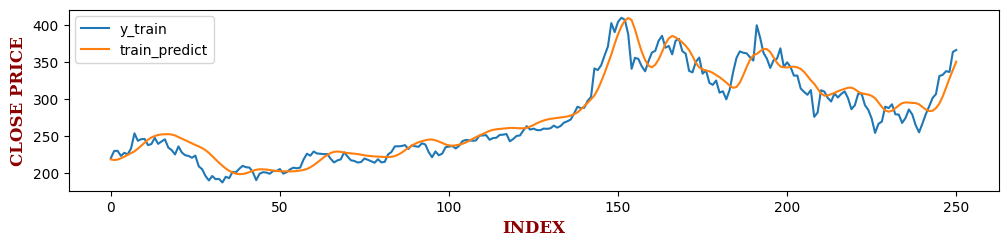

In [52]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 12,
        }

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(y_train, label='y_train')
plt.plot(train_predict, label='train_predict')
plt.xlabel("INDEX", fontdict=font)
plt.ylabel("CLOSE PRICE", fontdict=font)
plt.legend()

### 4.6 Mean Square Error - Training

In [53]:
math.sqrt(mean_squared_error(y_train, train_predict))

16.620567886797772

### 4.7 Mean Square Error - Test

In [54]:
math.sqrt(mean_squared_error(y_test, test_predict))

25.876462380466407

### 4.8 Plot : Actual vs Predicted : Complete DataSet

In [55]:
# first 50 will be vacant
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step, : ] = train_predict

testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+2*time_step+1:len(df_close)-1, :] = test_predict

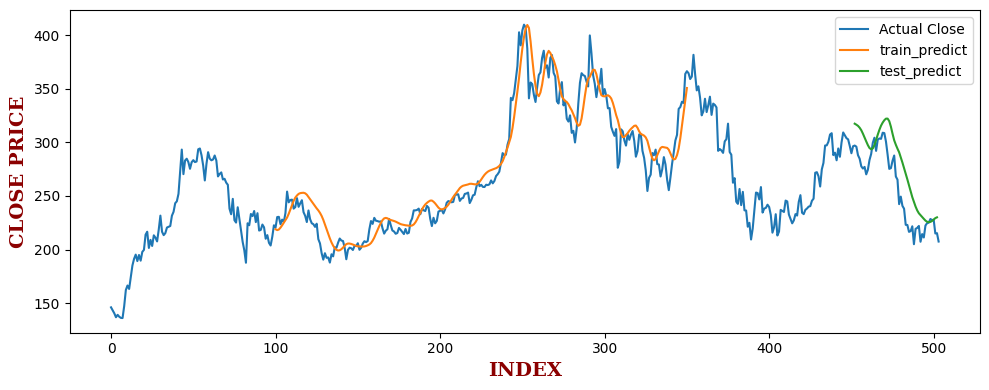

In [56]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 14,
        }

plt.figure(figsize=(10, 4))
plt.subplot(1, 1, 1)
plt.plot(scaler.inverse_transform(df_close), label='Actual Close')
plt.plot(trainPredictPlot, label='train_predict')
plt.plot(testPredictPlot, label='test_predict')
plt.xlabel('INDEX', fontdict=font)
plt.ylabel('CLOSE PRICE', fontdict=font)
plt.legend()                                                 # legend() : it is an area describing the elements of the graph

plt.tight_layout()                                           # tight_layout() : automatically adjusts the subplots in the area

## 5.0 Next 30 - Days Prediction

In [57]:
len(test_data)

152

In [58]:
x_input = test_data[52: ].reshape(1, -1)
print(type(x_input))
print(x_input.shape)

<class 'numpy.ndarray'>
(1, 100)


In [59]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
print(len(temp_input))
print(type(temp_input))

100
<class 'list'>


In [60]:
# predicting the next 30 days 

lst_output = []
i=0

while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, time_step, 1))
        y_input = model.predict(x_input, verbose=0)
        temp_input.extend(y_input[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(y_input[0].tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, time_step, 1))
        y_input = model.predict(x_input)
        temp_input.extend(y_input[0].tolist())
        lst_output.extend(y_input[0].tolist())
        i=i+1

1/1 [==============================] - 0s 127ms/step


### 5.2 Plot : Next 30 Day 

In [61]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [62]:
len(df_close)

504

In [63]:
lst_df = pd.DataFrame(lst_output)

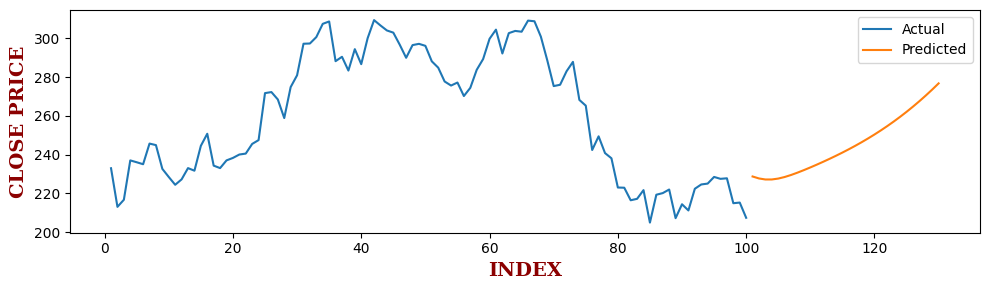

In [64]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 14,
        }

plt.figure(figsize=(10, 3))
plt.subplot(1, 1, 1)
plt.plot(day_new, scaler.inverse_transform(df_close[404:]), label = "Actual")
plt.plot(day_pred, scaler.inverse_transform(lst_df), label = "Predicted")
plt.xlabel('INDEX', fontdict=font)
plt.ylabel('CLOSE PRICE', fontdict=font)
plt.legend()                                                 # legend() : it is an area describing the elements of the graph

plt.tight_layout()      

### 5.3 Formatting in suitable format to Plot

In [65]:
arr = np.array(df_close[:])
arr = arr.reshape(1, -1)
temp = list(arr)
temp = temp[0].tolist()
temp.extend(lst_output)
final_df = pd.DataFrame(temp)

### 5.4 FINAL PLOT - AFTER INDEX 500

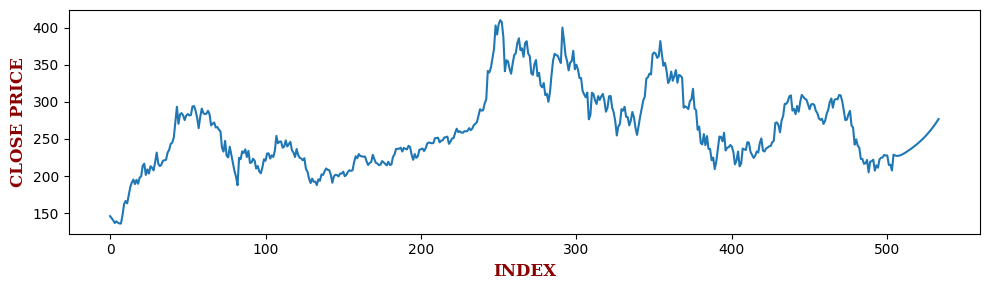

In [66]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 12,
        }

plt.figure(figsize=(10, 3))
plt.subplot(1, 1, 1)
plt.plot(scaler.inverse_transform(final_df))
plt.xlabel('INDEX', fontdict=font)
plt.ylabel('CLOSE PRICE', fontdict=font)
plt.tight_layout()